# Priprava podatkov

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("dataset_nov.xls")

In [2]:
# Checking for duplicates in the 'Article Title' column
duplicate_titles = df[df.duplicated(subset='Article Title', keep=False)]

# Count the number of duplicates
num_duplicates = len(duplicate_titles)

if num_duplicates > 0:
    print(f"Found {num_duplicates} duplicate entries based on 'Article Title'.")
    
    # Removing duplicates, keeping only the first occurrence
    df_cleaned = df.drop_duplicates(subset='Article Title', keep='first')
    
    # Number of entries removed
    entries_removed = len(df) - len(df_cleaned)
    print(f"{entries_removed} duplicate entries removed from the DataFrame.")
else:
    print("No duplicate entries found in the 'Article Title' column.")

# Updating the DataFrame after removing duplicates
df = df_cleaned if num_duplicates > 0 else df

Found 2 duplicate entries based on 'Article Title'.
1 duplicate entries removed from the DataFrame.


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\borbr\AppData\Local\Temp\ipykernel_11528\3647661147.py:4: SyntaxWarning: invalid escape sequence '\s'
  df['Publisher'] = df['Publisher'].str.replace('\s+', ' ', regex=True)


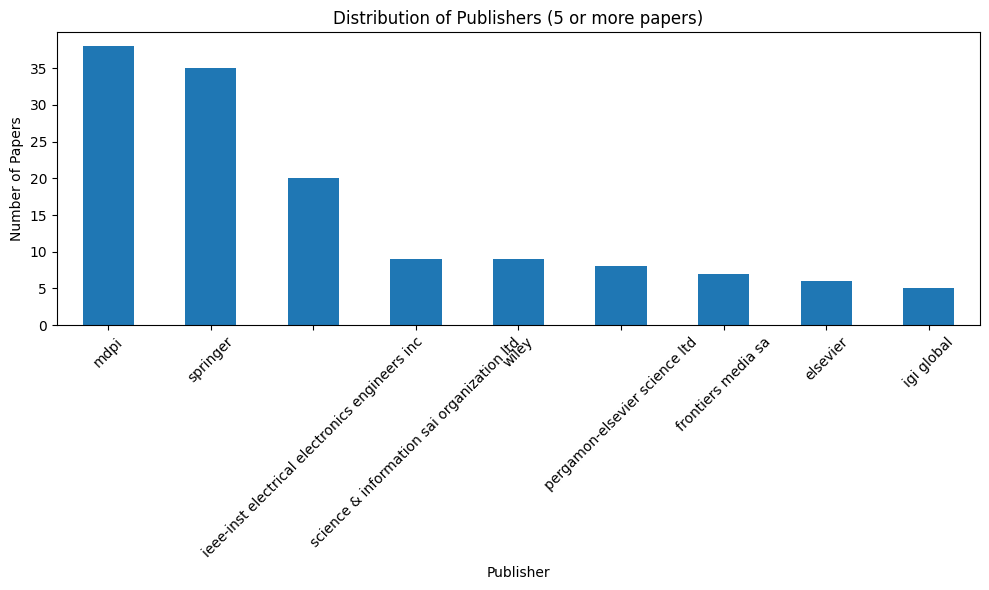

In [3]:
df['Publisher'] = df['Publisher'].str.strip().str.lower().replace('', 'unknown').fillna('unknown')

# 2. Replace non-breaking spaces or other special whitespace characters
df['Publisher'] = df['Publisher'].str.replace('\s+', ' ', regex=True)

# Calculate the counts of each publisher
publisher_counts = df['Publisher'].value_counts()

# Filter to include only publishers with 5 or more occurrences
filtered_publisher_counts = publisher_counts[publisher_counts >= 5]

# Plotting the distribution
plt.figure(figsize=(10, 6))
filtered_publisher_counts.plot(kind='bar')
plt.title('Distribution of Publishers (5 or more papers)')
plt.xlabel('Publisher')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Topic 1:
profile, indicators, dedicated, challenges, integrating, analyse, quality, key, worldwide, build
Topic 2:
students, learning, performance, data, academic, student, machine, model, models, educational
Topic 3:
student, performance, academic, features, learning, prediction, accuracy, education, students, data
Topic 4:
learning, usepackage, students, student, performance, ai, model, study, course, prediction
Topic 5:
learning, performance, students, model, prediction, study, academic, models, student, machine


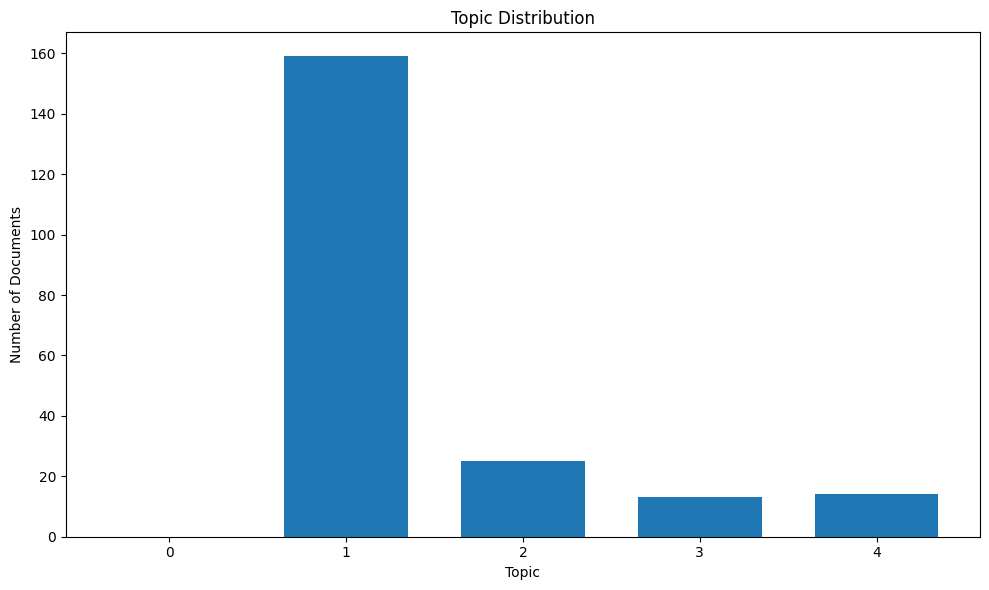

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Preprocess the 'Abstract' column: remove NaN, convert to lowercase, and strip whitespace
df['Abstract'] = df['Abstract'].dropna().str.lower().str.strip()

# Vectorization: Convert text to a document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
dtm = vectorizer.fit_transform(df['Abstract'])

# LDA Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)

# Plotting the distribution of topics
topic_distribution = lda.transform(dtm)
topic_counts = topic_distribution.argmax(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(topic_counts, bins=range(lda.n_components + 1), align='left', rwidth=0.7)
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(range(lda.n_components))
plt.tight_layout()
plt.show()


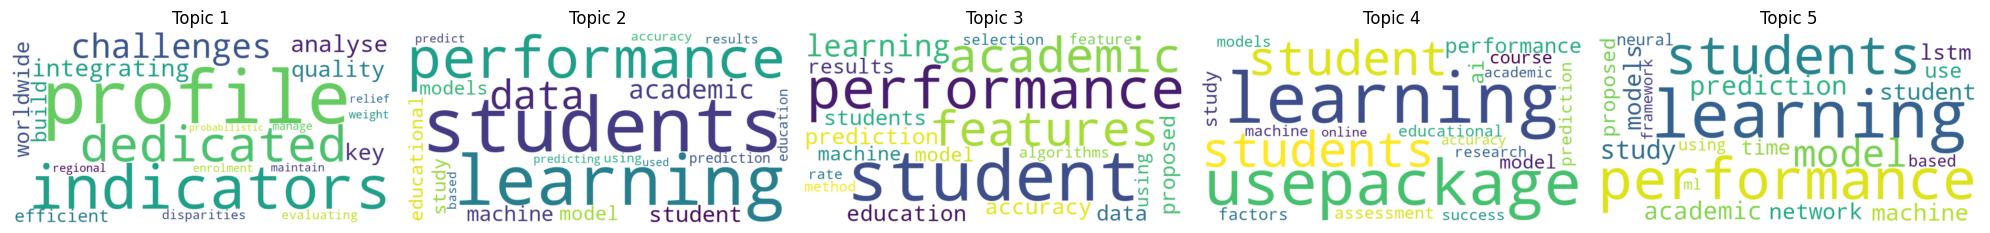

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preprocess the 'Abstract' column: remove NaN, convert to lowercase, and strip whitespace
df['Abstract'] = df['Abstract'].dropna().str.lower().str.strip()

# Vectorization: Convert text to a document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
dtm = vectorizer.fit_transform(df['Abstract'])

# LDA Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Extracting topics
feature_names = vectorizer.get_feature_names_out()
no_top_words = 20

# Create a figure for the word clouds
fig, axes = plt.subplots(1, 5, figsize=(20, 8), sharex=True, sharey=True)

for topic_idx, topic in enumerate(lda.components_):
    top_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-no_top_words - 1:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)
    
    ax = axes[topic_idx]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {topic_idx + 1}')

plt.tight_layout()
plt.show()


In [6]:
# Descriptive statistics for Cited Reference Count
cited_reference_stats = df['Cited Reference Count'].describe()
print(cited_reference_stats)


count    211.000000
mean      47.763033
std       20.960979
min        9.000000
25%       34.000000
50%       44.000000
75%       58.000000
max      143.000000
Name: Cited Reference Count, dtype: float64


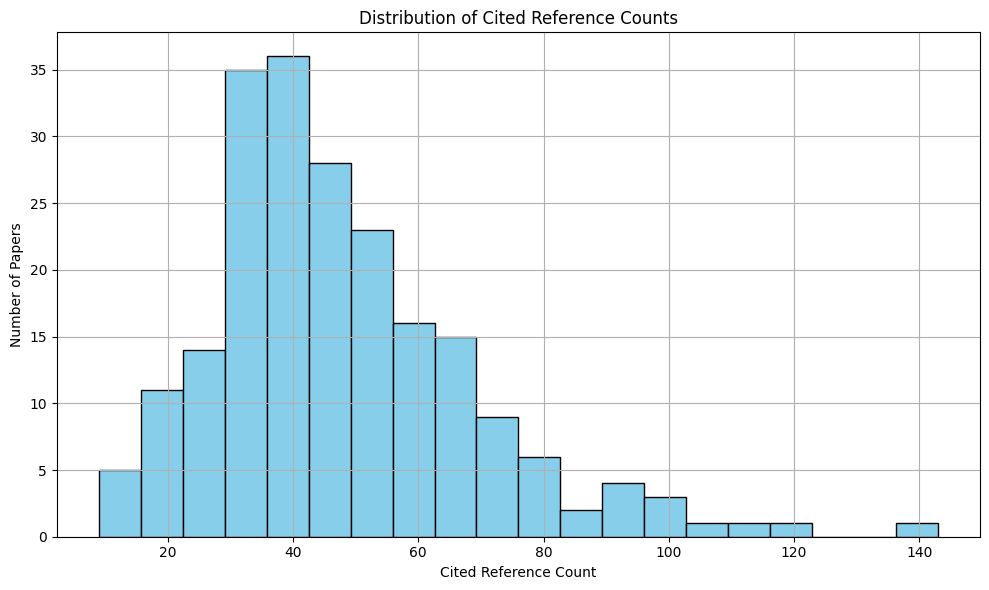

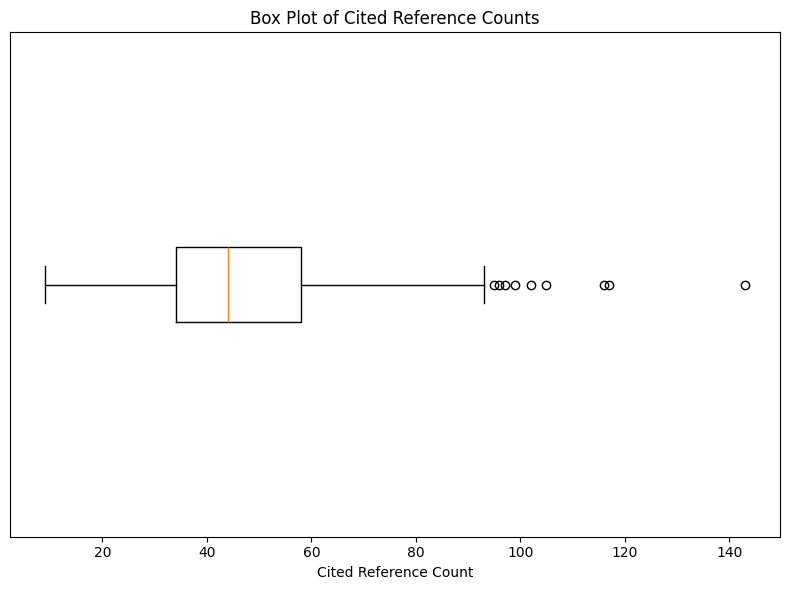

In [7]:
import matplotlib.pyplot as plt

# Histogram for Cited Reference Count
plt.figure(figsize=(10, 6))
plt.hist(df['Cited Reference Count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Cited Reference Counts')
plt.xlabel('Cited Reference Count')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.tight_layout()
plt.show()

# Box plot for Cited Reference Count
plt.figure(figsize=(8, 6))
plt.boxplot(df['Cited Reference Count'].dropna(), vert=False)
plt.title('Box Plot of Cited Reference Counts')
plt.xlabel('Cited Reference Count')

# Removing the y-axis ticks and label
plt.yticks([])

plt.tight_layout()
plt.show()



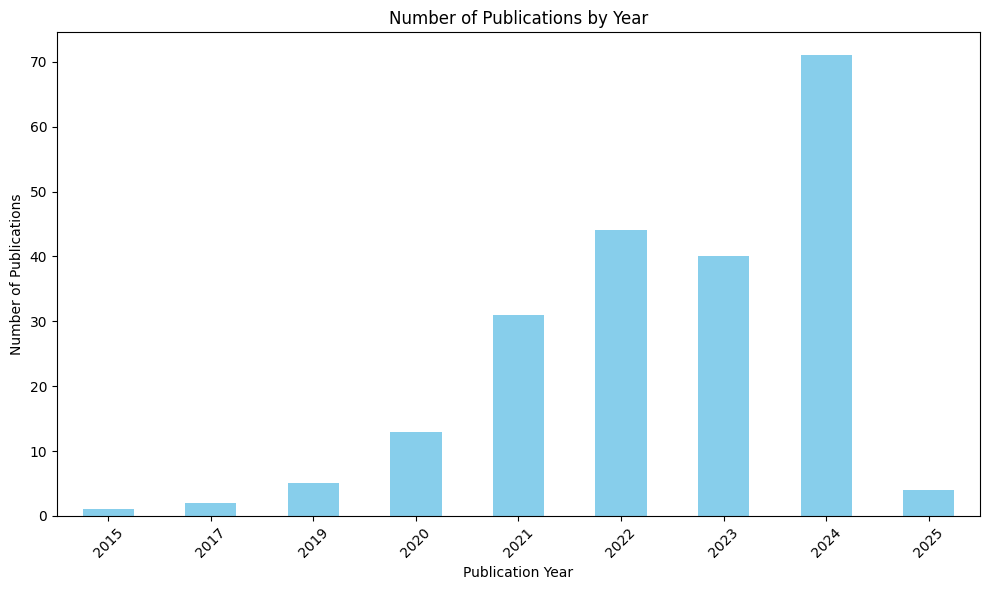

In [8]:
import matplotlib.pyplot as plt

# Count publications by year
publications_per_year = df['Publication Year'].value_counts().sort_index()

# Plotting the number of publications by year
plt.figure(figsize=(10, 6))
publications_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Publications by Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


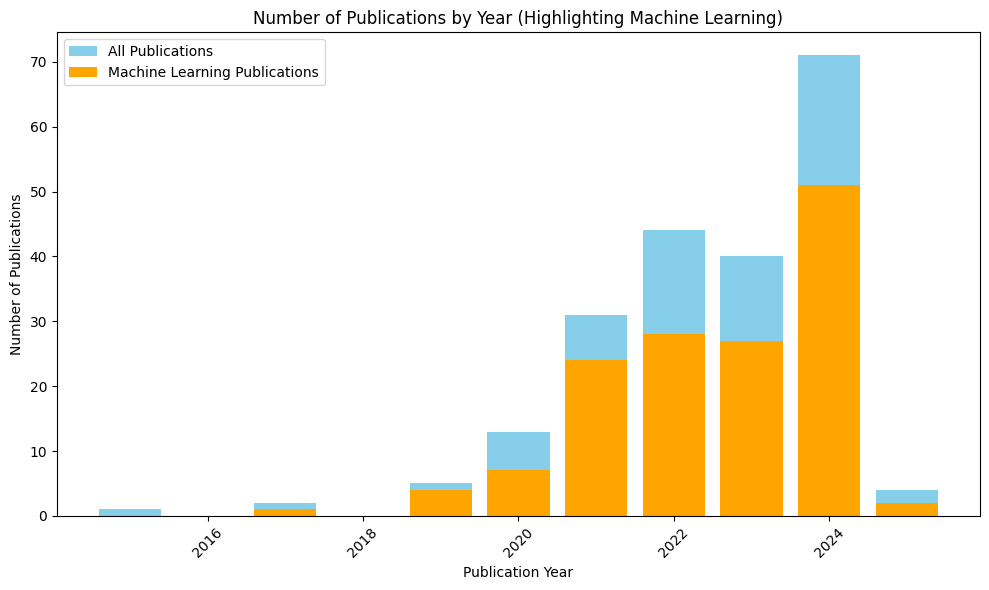

In [9]:
# Filter rows with 'machine learning' in 'Author Keywords'
df['Author Keywords'] = df['Author Keywords'].fillna('').str.lower()
ml_publications_per_year = df[df['Author Keywords'].str.contains('machine learning')]['Publication Year'].value_counts().sort_index()

# Plotting the advanced bar chart
plt.figure(figsize=(10, 6))

# Bar chart for all publications
plt.bar(publications_per_year.index, publications_per_year.values, color='skyblue', label='All Publications')

# Bar chart for publications with 'machine learning' keyword
plt.bar(ml_publications_per_year.index, ml_publications_per_year.values, color='orange', label='Machine Learning Publications')

plt.title('Number of Publications by Year (Highlighting Machine Learning)')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


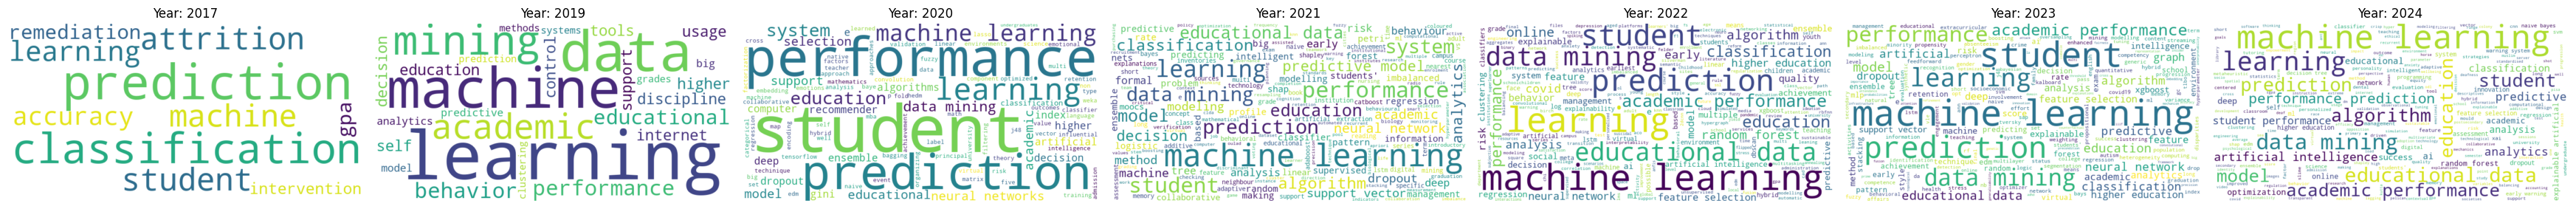

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Assuming 'df' is your DataFrame and it has columns 'Publication Year' and 'Author Keywords'

# Filter out the years 2015 and 2025
filtered_df = df[~df['Publication Year'].isin([2015, 2025])]

# Group data by 'Publication Year' and concatenate all author keywords for each year
year_keywords_dict = filtered_df.groupby('Publication Year')['Author Keywords'].apply(lambda x: ' '.join(x.dropna())).to_dict()

# Determine the number of unique years for subplot layout
num_years = len(year_keywords_dict)
fig, axes = plt.subplots(1, num_years, figsize=(5 * num_years, 5))

# Generate word cloud for each year and plot in the corresponding subplot
for i, (year, keywords) in enumerate(sorted(year_keywords_dict.items())):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Year: {year}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


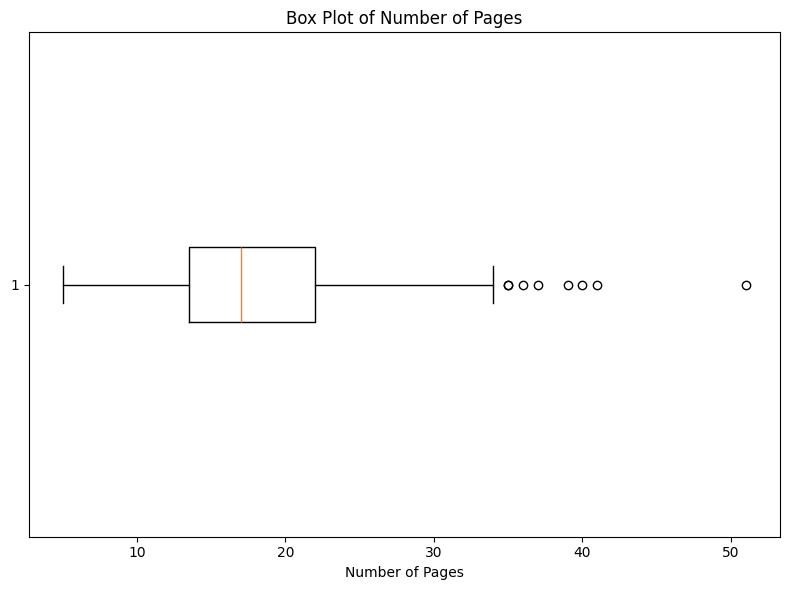

In [11]:
import matplotlib.pyplot as plt

# Create a boxplot for the 'Number of Pages' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['Number of Pages'].dropna(), vert=False)
plt.title('Box Plot of Number of Pages')
plt.xlabel('Number of Pages')
plt.tight_layout()
plt.show()


In [12]:
#neki o wos index

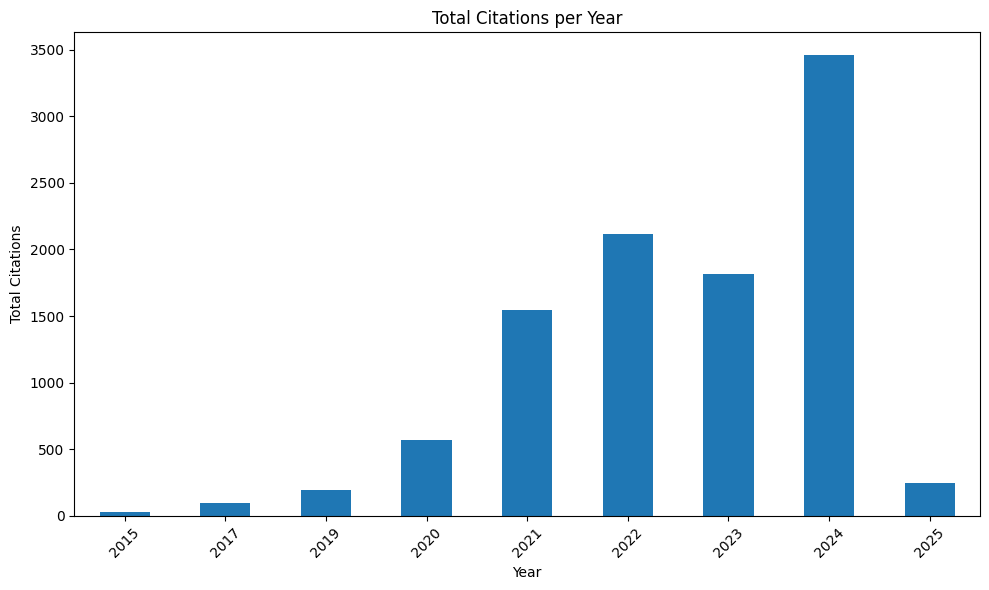

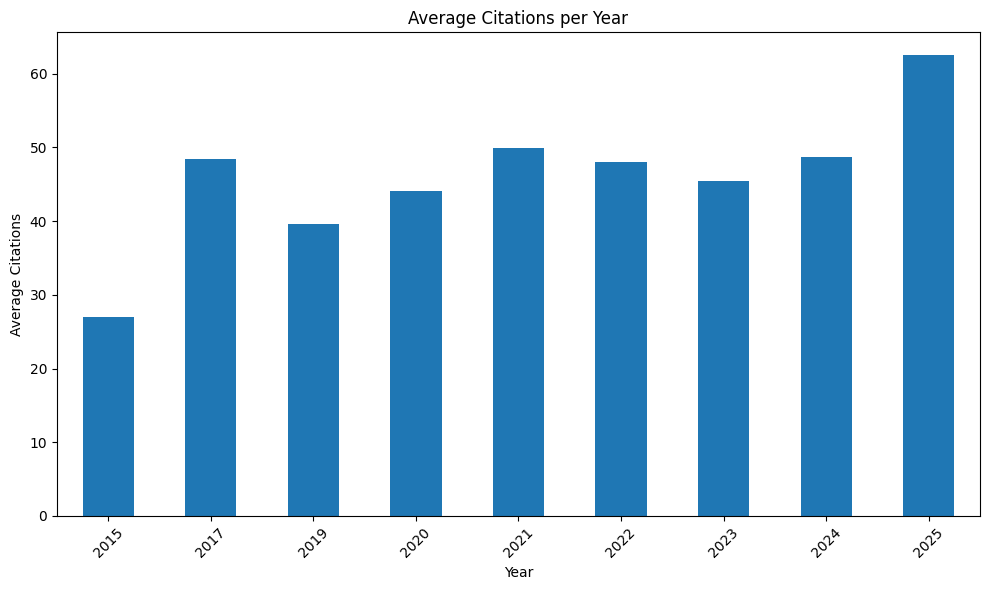

In [13]:

# Grouping by 'Publication Year' and calculating the sum of citations per year
citations_per_year = df.groupby('Publication Year')['Cited Reference Count'].sum()

# Plotting the citations per year
plt.figure(figsize=(10, 6))
citations_per_year.plot(kind='bar')
plt.title('Total Citations per Year')
plt.xlabel('Year')
plt.ylabel('Total Citations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: If you want to calculate the average citations per year instead
average_citations_per_year = df.groupby('Publication Year')['Cited Reference Count'].mean()

# Plotting the average citations per year
plt.figure(figsize=(10, 6))
average_citations_per_year.plot(kind='bar')
plt.title('Average Citations per Year')
plt.xlabel('Year')
plt.ylabel('Average Citations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()